# SEED-DV Dataset Meta Information Analysis

This notebook is dedicated to exploring meta information in the SEED-DV dataset, including:
- Loading and analyzing various meta data files (All_video_color.npy, etc.)
- Video properties and characteristics analysis
- Stimulus material metadata exploration
- Cross-validation of meta information consistency
- Visualization of video features and annotations

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import sys
from glob import glob
import warnings
warnings.filterwarnings('ignore')

# Add project root directory to Python path
project_root = Path('.').absolute().parent
sys.path.append(str(project_root))

# Set matplotlib display parameters
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

# Please modify this path according to your actual situation
SEED_DV_DATA_PATH = project_root / 'data' / 'SEED-DV'/'Meta'

print(f"Project root directory: {project_root}")
print(f"Current working directory: {os.getcwd()}")
print(f"SEED-DV data path: {SEED_DV_DATA_PATH}")

Project root directory: /mnt/f/NEED
Current working directory: /mnt/f/NEED/analysis_notebooks
SEED-DV data path: /mnt/f/NEED/data/SEED-DV/Meta


## 1. SEED-DV Meta Data Path Exploration

In [10]:
# Check if SEED-DV data path exists and explore meta information files
print("=== SEED-DV Meta Data Check ===")

if not SEED_DV_DATA_PATH.exists():
    print(f"❌ Data path does not exist: {SEED_DV_DATA_PATH}")
    print("Please confirm:")
    print("1. SEED-DV dataset has been downloaded")
    print("2. Dataset is placed in the correct location")
    print("3. Modify SEED_DV_DATA_PATH in the cell above to the correct path")
else:
    print(f"✅ Found data path: {SEED_DV_DATA_PATH}")
    
    # Explore directory structure
    print("\n📁 Directory structure:")
    for item in sorted(SEED_DV_DATA_PATH.iterdir()):
        if item.is_dir():
            print(f"  📂 {item.name}/")
            # Look for files in subdirectories
            subfiles = list(item.rglob('*.npy'))
            if subfiles:
                print(f"    └─ {len(subfiles)} .npy files")
        else:
            print(f"  📄 {item.name} ({item.stat().st_size / (1024*1024):.2f} MB)")
    
    # Search for meta information files
    print("\n🔍 Searching for meta information files...")
    
    # Common meta file patterns
    meta_patterns = [
        '**/All_video_color.npy',
        '**/All_video_face_apperance.npy', 
        '**/All_video_human_apperance.npy',
        '**/All_video_label.npy',
        '**/All_video_obj_number.npy',
        '**/All_video_optical_flow_score.npy'
    ]
    
    meta_files = []
    for pattern in meta_patterns:
        found_files = list(SEED_DV_DATA_PATH.rglob(pattern))
        meta_files.extend(found_files)
    
    # Remove duplicates
    meta_files = list(set(meta_files))
    
    print(f"\nFound meta information files: {len(meta_files)}")
    if meta_files:
        for i, meta_file in enumerate(sorted(meta_files)):
            size_mb = meta_file.stat().st_size / (1024 * 1024)
            rel_path = meta_file.relative_to(SEED_DV_DATA_PATH)
            print(f"  {i+1:2d}. {rel_path} ({size_mb:.2f} MB)")
    else:
        print("❌ No meta information files found with common patterns")
        print("Let's search for all .npy files...")
        
        all_npy_files = list(SEED_DV_DATA_PATH.rglob('*.npy'))
        print(f"\nAll .npy files found: {len(all_npy_files)}")
        
        if all_npy_files:
            print("First 20 files:")
            for i, npy_file in enumerate(sorted(all_npy_files)[:20]):
                size_mb = npy_file.stat().st_size / (1024 * 1024)
                rel_path = npy_file.relative_to(SEED_DV_DATA_PATH)
                print(f"  {i+1:2d}. {rel_path} ({size_mb:.2f} MB)")
            
            if len(all_npy_files) > 20:
                print(f"  ... and {len(all_npy_files) - 20} more files")
            
            meta_files = all_npy_files  # Use all files for analysis

=== SEED-DV Meta Data Check ===
✅ Found data path: /mnt/f/NEED/data/SEED-DV/Meta

📁 Directory structure:
  📄 All_video_color.npy (0.01 MB)
  📄 All_video_face_apperance.npy (0.01 MB)
  📄 All_video_human_apperance.npy (0.01 MB)
  📄 All_video_label.npy (0.00 MB)
  📄 All_video_obj_number.npy (0.01 MB)
  📄 All_video_optical_flow_score.npy (0.01 MB)

🔍 Searching for meta information files...

Found meta information files: 6
   1. All_video_color.npy (0.01 MB)
   2. All_video_face_apperance.npy (0.01 MB)
   3. All_video_human_apperance.npy (0.01 MB)
   4. All_video_label.npy (0.00 MB)
   5. All_video_obj_number.npy (0.01 MB)
   6. All_video_optical_flow_score.npy (0.01 MB)


## 2. Analyze Specific Meta Information Files

In [14]:
# Focus on specific meta information files
print("=== Specific Meta File Analysis ===")

if 'meta_files' in globals() and meta_files:
    # Look for specific files of interest
    target_files = {
        'video_color': None,
        'video_face': None,
        'labels': None,
        'obj': None,
        'human': None
    }
    
    # Match files to categories
    for file_path in meta_files:
        filename = file_path.name.lower()
        
        if 'color' in filename and 'video' in filename:
            target_files['video_color'] = file_path
        elif 'face' in filename and ('face' in filename or 'meta' in filename):
            target_files['video_face'] = file_path
        elif 'label' in filename:
            target_files['labels'] = file_path
        elif 'obj' in filename:
            target_files['obj'] = file_path
        elif 'human' in filename:
            target_files['human'] = file_path
    
    print("\n📋 Categorized meta files:")
    for category, file_path in target_files.items():
        if file_path:
            size_mb = file_path.stat().st_size / (1024 * 1024)
            rel_path = file_path.relative_to(SEED_DV_DATA_PATH)
            print(f"  {category:12}: {rel_path} ({size_mb:.2f} MB)")
        else:
            print(f"  {category:12}: Not found")
    
    # Store for later analysis
    globals()['target_meta_files'] = target_files
    
else:
    print("No meta files available for analysis")

=== Specific Meta File Analysis ===

📋 Categorized meta files:
  video_color : All_video_color.npy (0.01 MB)
  video_face  : All_video_face_apperance.npy (0.01 MB)
  labels      : All_video_label.npy (0.00 MB)
  obj         : All_video_obj_number.npy (0.01 MB)
  human       : All_video_human_apperance.npy (0.01 MB)


## 3. Load and Analyze Video Color Information

In [15]:
# Analyze video color data if available
print("=== Video Color Information Analysis ===")

if 'target_meta_files' in globals() and target_meta_files.get('video_color'):
    color_file = target_meta_files['video_color']
    print(f"Loading: {color_file.name}")
    
    try:
        color_data = np.load(color_file)
        
        print(f"\n📊 Color data basic info:")
        print(f"  Data type: {type(color_data)}")
        print(f"  Data shape: {color_data.shape}")
        print(f"  Data dtype: {color_data.dtype}")
        print(f"  Data size: {color_data.nbytes / (1024*1024):.2f} MB")
        
        print(f"\n📈 Color data statistics:")
        print(f"  Min value: {color_data.min():.6f}")
        print(f"  Max value: {color_data.max():.6f}")
        print(f"  Mean value: {color_data.mean():.6f}")
        print(f"  Standard deviation: {color_data.std():.6f}")
        
        # Analyze data structure
        if len(color_data.shape) == 1:
            print(f"\n🎨 1D Color data - possibly overall color measures")
            print(f"  Number of videos/measures: {color_data.shape[0]}")
        elif len(color_data.shape) == 2:
            print(f"\n🎨 2D Color data structure analysis:")
            print(f"  Dimension 0: {color_data.shape[0]}")
            print(f"  Dimension 1: {color_data.shape[1]}")
            
            # Common interpretations
            if color_data.shape[1] == 3:
                print(f"  → Likely RGB color values")
            elif color_data.shape[1] == 4:
                print(f"  → Likely RGBA color values")
            else:
                print(f"  → Color features or temporal color data")
        elif len(color_data.shape) == 3:
            print(f"\n🎨 3D Color data - possibly temporal or spatial color info")
            print(f"  Dimension 0: {color_data.shape[0]} (videos/trials)")
            print(f"  Dimension 1: {color_data.shape[1]} (time/regions)")
            print(f"  Dimension 2: {color_data.shape[2]} (color channels)")
        
        # Store for visualization
        globals()['video_color_data'] = color_data
        print("\n✅ Video color data loaded successfully")
        
    except Exception as e:
        print(f"❌ Error loading video color data: {e}")
        
else:
    print("No video color file found")
    # Try to find any file with 'color' in the name
    if 'meta_files' in globals():
        color_candidates = [f for f in meta_files if 'color' in f.name.lower()]
        if color_candidates:
            print(f"\nFound {len(color_candidates)} files with 'color' in name:")
            for f in color_candidates:
                rel_path = f.relative_to(SEED_DV_DATA_PATH)
                size_mb = f.stat().st_size / (1024 * 1024)
                print(f"  - {rel_path} ({size_mb:.2f} MB)")

=== Video Color Information Analysis ===
Loading: All_video_color.npy

📊 Color data basic info:
  Data type: <class 'numpy.ndarray'>
  Data shape: (7, 200)
  Data dtype: float64
  Data size: 0.01 MB

📈 Color data statistics:
  Min value: 0.000000
  Max value: 6.000000
  Mean value: 0.855000
  Standard deviation: 1.663809

🎨 2D Color data structure analysis:
  Dimension 0: 7
  Dimension 1: 200
  → Color features or temporal color data

✅ Video color data loaded successfully


## 4. Visualize Video Color Data

=== Video Color Data Visualization ===


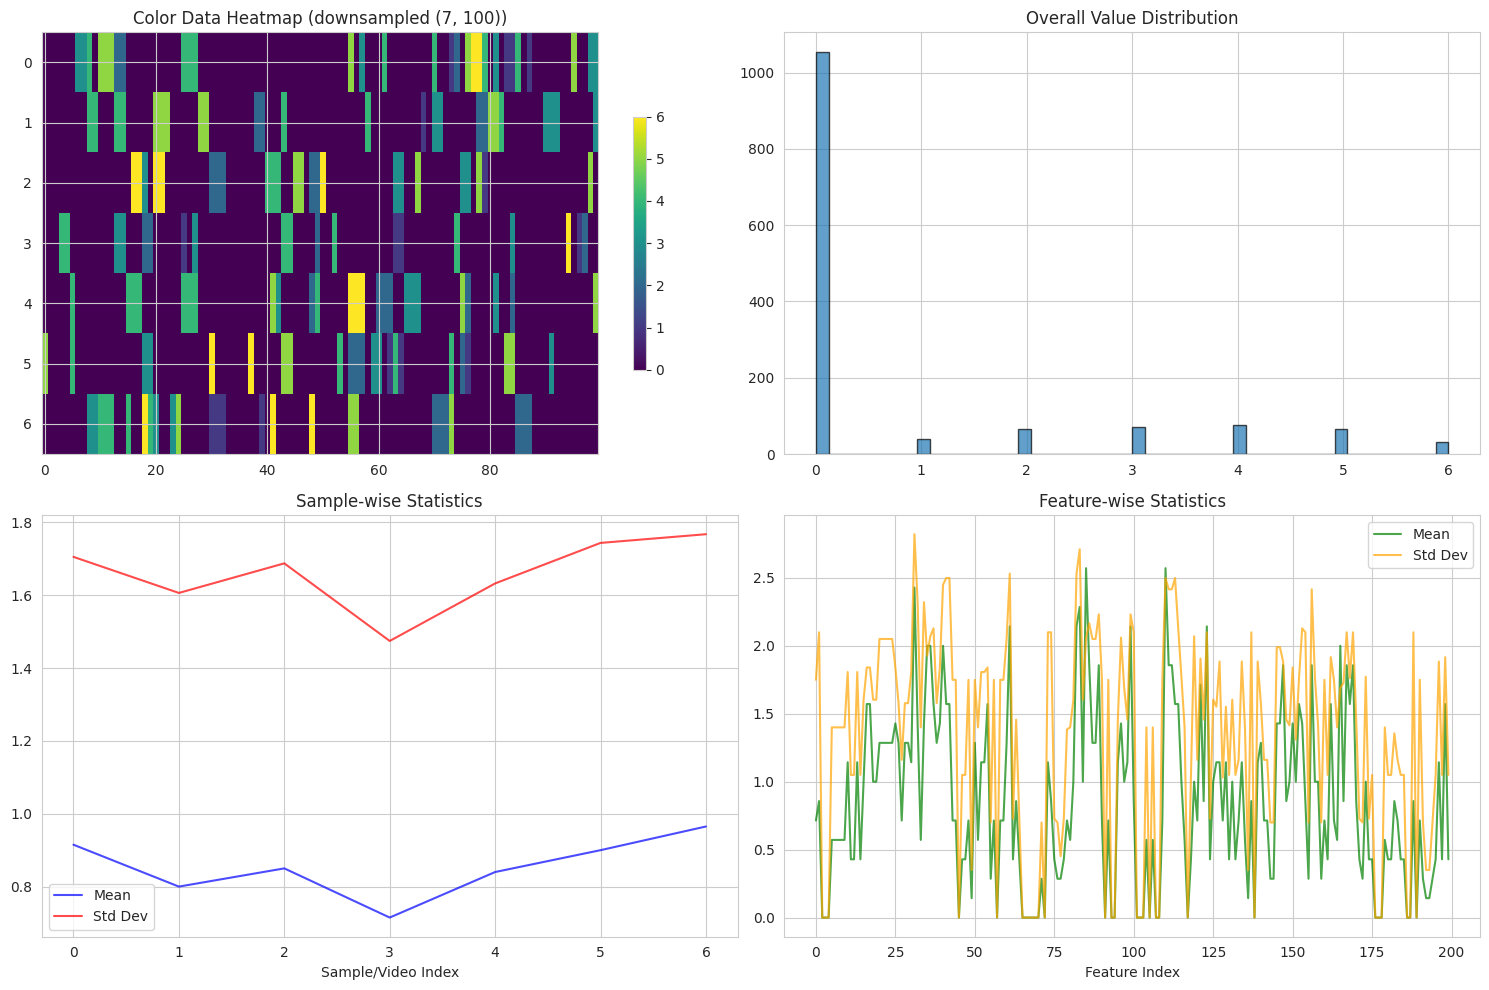

In [16]:
# Visualize video color information
print("=== Video Color Data Visualization ===")

if 'video_color_data' in globals():
    color_data = video_color_data
    
    # Create visualization based on data structure
    if len(color_data.shape) == 1:
        # 1D data visualization
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Histogram
        axes[0, 0].hist(color_data, bins=30, alpha=0.7, edgecolor='black')
        axes[0, 0].set_title('Color Value Distribution')
        axes[0, 0].set_xlabel('Color Value')
        axes[0, 0].set_ylabel('Frequency')
        
        # Line plot
        axes[0, 1].plot(color_data, 'bo-', markersize=3)
        axes[0, 1].set_title('Color Values by Index')
        axes[0, 1].set_xlabel('Index')
        axes[0, 1].set_ylabel('Color Value')
        
        # Box plot
        axes[1, 0].boxplot([color_data], labels=['Color Data'])
        axes[1, 0].set_title('Color Data Distribution')
        axes[1, 0].set_ylabel('Value')
        
        # Summary statistics text
        axes[1, 1].axis('off')
        stats_text = f"""
        Summary Statistics:
        
        Count: {len(color_data)}
        Mean: {color_data.mean():.4f}
        Std: {color_data.std():.4f}
        Min: {color_data.min():.4f}
        Max: {color_data.max():.4f}
        
        Percentiles:
        25%: {np.percentile(color_data, 25):.4f}
        50%: {np.percentile(color_data, 50):.4f}
        75%: {np.percentile(color_data, 75):.4f}
        """
        axes[1, 1].text(0.1, 0.5, stats_text, fontsize=10, verticalalignment='center')
        
    elif len(color_data.shape) == 2:
        # 2D data visualization
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Heatmap
        if color_data.shape[0] <= 100 and color_data.shape[1] <= 100:
            im = axes[0, 0].imshow(color_data, aspect='auto', cmap='viridis')
            axes[0, 0].set_title('Color Data Heatmap')
            axes[0, 0].set_xlabel('Feature/Channel')
            axes[0, 0].set_ylabel('Video/Sample')
            plt.colorbar(im, ax=axes[0, 0], shrink=0.6)
        else:
            # Downsample for visualization
            step_0 = max(1, color_data.shape[0] // 100)
            step_1 = max(1, color_data.shape[1] // 100)
            downsampled = color_data[::step_0, ::step_1]
            im = axes[0, 0].imshow(downsampled, aspect='auto', cmap='viridis')
            axes[0, 0].set_title(f'Color Data Heatmap (downsampled {downsampled.shape})')
            plt.colorbar(im, ax=axes[0, 0], shrink=0.6)
        
        # Feature-wise distribution
        if color_data.shape[1] <= 10:
            for i in range(min(color_data.shape[1], 5)):
                axes[0, 1].hist(color_data[:, i], alpha=0.6, bins=20, label=f'Feature {i}')
            axes[0, 1].set_title('Feature Distributions')
            axes[0, 1].legend()
        else:
            axes[0, 1].hist(color_data.flatten(), bins=50, alpha=0.7, edgecolor='black')
            axes[0, 1].set_title('Overall Value Distribution')
        
        # Sample-wise statistics
        sample_means = color_data.mean(axis=1)
        sample_stds = color_data.std(axis=1)
        
        axes[1, 0].plot(sample_means, 'b-', alpha=0.7, label='Mean')
        axes[1, 0].plot(sample_stds, 'r-', alpha=0.7, label='Std Dev')
        axes[1, 0].set_title('Sample-wise Statistics')
        axes[1, 0].set_xlabel('Sample/Video Index')
        axes[1, 0].legend()
        
        # Feature correlation (if reasonable size)
        if color_data.shape[1] <= 20:
            corr_matrix = np.corrcoef(color_data.T)
            im = axes[1, 1].imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
            axes[1, 1].set_title('Feature Correlation Matrix')
            plt.colorbar(im, ax=axes[1, 1], shrink=0.6)
        else:
            # Show feature-wise statistics
            feature_means = color_data.mean(axis=0)
            feature_stds = color_data.std(axis=0)
            axes[1, 1].plot(feature_means, 'g-', alpha=0.7, label='Mean')
            axes[1, 1].plot(feature_stds, 'orange', alpha=0.7, label='Std Dev')
            axes[1, 1].set_title('Feature-wise Statistics')
            axes[1, 1].set_xlabel('Feature Index')
            axes[1, 1].legend()
    
    elif len(color_data.shape) == 3:
        # 3D data visualization
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        
        # Show first sample as example
        if color_data.shape[2] == 3:  # RGB data
            # Treat as RGB and show first sample
            sample_rgb = color_data[0]
            if sample_rgb.max() <= 1.0:
                sample_rgb = np.clip(sample_rgb, 0, 1)
            else:
                sample_rgb = np.clip(sample_rgb / sample_rgb.max(), 0, 1)
            
            axes[0, 0].imshow(sample_rgb.reshape(-1, 1, 3))
            axes[0, 0].set_title('First Sample as RGB')
        else:
            # Show as heatmap
            im = axes[0, 0].imshow(color_data[0], aspect='auto', cmap='viridis')
            axes[0, 0].set_title('First Sample Heatmap')
            plt.colorbar(im, ax=axes[0, 0], shrink=0.6)
        
        # Channel-wise mean across samples
        for ch in range(min(3, color_data.shape[2])):
            channel_mean = color_data[:, :, ch].mean(axis=1)
            axes[0, 1].plot(channel_mean, label=f'Channel {ch}', alpha=0.7)
        axes[0, 1].set_title('Channel Means Across Samples')
        axes[0, 1].legend()
        
        # Overall distribution
        axes[0, 2].hist(color_data.flatten(), bins=50, alpha=0.7, edgecolor='black')
        axes[0, 2].set_title('Overall Value Distribution')
        
        # Time series for first few samples
        for i in range(min(5, color_data.shape[0])):
            if color_data.shape[2] == 3:  # RGB
                rgb_intensity = color_data[i].mean(axis=1)  # Average RGB
                axes[1, 0].plot(rgb_intensity, alpha=0.7, label=f'Sample {i}')
            else:
                axes[1, 0].plot(color_data[i, :, 0], alpha=0.7, label=f'Sample {i}')
        axes[1, 0].set_title('Temporal Evolution (First 5 samples)')
        axes[1, 0].legend()
        
        # Sample statistics
        sample_means = color_data.mean(axis=(1, 2))
        sample_stds = color_data.std(axis=(1, 2))
        
        axes[1, 1].bar(range(len(sample_means)), sample_means, alpha=0.7)
        axes[1, 1].set_title('Sample-wise Mean Values')
        axes[1, 1].set_xlabel('Sample Index')
        
        # Channel statistics
        if color_data.shape[2] <= 10:
            channel_means = color_data.mean(axis=(0, 1))
            channel_stds = color_data.std(axis=(0, 1))
            
            x_pos = np.arange(len(channel_means))
            axes[1, 2].bar(x_pos, channel_means, yerr=channel_stds, 
                          alpha=0.7, capsize=5, error_kw={'linewidth': 1})
            axes[1, 2].set_title('Channel-wise Statistics')
            axes[1, 2].set_xlabel('Channel Index')
            axes[1, 2].set_xticks(x_pos)
        else:
            axes[1, 2].text(0.5, 0.5, f'Too many channels ({color_data.shape[2]})\nto visualize individually', 
                          ha='center', va='center', transform=axes[1, 2].transAxes)
            axes[1, 2].set_title('Channel Info')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No video color data available for visualization")

## 5. Analyze Other Meta Information Files

In [17]:
# Analyze other available meta files
print("=== Other Meta Information Analysis ===")

meta_data_collection = {}

if 'target_meta_files' in globals():
    for category, file_path in target_meta_files.items():
        if file_path and category != 'video_color':  # Skip video_color as we analyzed it above
            print(f"\n📋 Analyzing {category}: {file_path.name}")
            
            try:
                data = np.load(file_path)
                
                print(f"  Shape: {data.shape}")
                print(f"  Dtype: {data.dtype}")
                print(f"  Size: {data.nbytes / (1024*1024):.2f} MB")
                
                if data.size > 0:
                    print(f"  Value range: [{data.min():.6f}, {data.max():.6f}]")
                    print(f"  Mean: {data.mean():.6f}")
                    
                    # Store for later analysis
                    meta_data_collection[category] = {
                        'data': data,
                        'file_path': file_path,
                        'shape': data.shape,
                        'dtype': str(data.dtype)
                    }
                    
                    # Specific analysis based on category
                    if 'label' in category:
                        unique_labels = np.unique(data)
                        print(f"  Unique labels: {len(unique_labels)}")
                        print(f"  Label range: {unique_labels[:10]}{'...' if len(unique_labels) > 10 else ''}")
                    
                    elif 'info' in category:
                        print(f"  Info data analysis:")
                        if len(data.shape) == 1:
                            print(f"    - 1D info array with {len(data)} entries")
                        elif len(data.shape) == 2:
                            print(f"    - 2D info matrix: {data.shape[0]} items × {data.shape[1]} features")
                
                print(f"  ✅ Successfully loaded")
                
            except Exception as e:
                print(f"  ❌ Error loading: {e}")
                continue

# Also analyze other interesting files
if 'meta_files' in globals() and len(meta_files) > 0:
    print(f"\n\n🔍 Quick scan of all meta files ({len(meta_files)} total):")
    
    file_summary = []
    
    for file_path in meta_files[:15]:  # Analyze first 15 files to avoid overload
        try:
            data = np.load(file_path)
            rel_path = file_path.relative_to(SEED_DV_DATA_PATH)
            
            file_info = {
                'file': str(rel_path),
                'shape': str(data.shape),
                'dtype': str(data.dtype),
                'size_mb': data.nbytes / (1024*1024),
                'unique_vals': len(np.unique(data)) if data.size < 10000 else 'N/A'
            }
            
            file_summary.append(file_info)
            
        except Exception as e:
            print(f"  Error with {file_path.name}: {e}")
    
    if file_summary:
        summary_df = pd.DataFrame(file_summary)
        print("\n📊 File Summary:")
        print(summary_df.to_string(index=False))
        
        globals()['meta_file_summary'] = summary_df

globals()['meta_data_collection'] = meta_data_collection
print(f"\n✅ Analyzed {len(meta_data_collection)} meta information files")

=== Other Meta Information Analysis ===

📋 Analyzing video_face: All_video_face_apperance.npy
  Shape: (7, 200)
  Dtype: float64
  Size: 0.01 MB
  Value range: [0.000000, 1.000000]
  Mean: 0.178571
  ✅ Successfully loaded

📋 Analyzing labels: All_video_label.npy
  Shape: (7, 40)
  Dtype: int64
  Size: 0.00 MB
  Value range: [1.000000, 40.000000]
  Mean: 20.500000
  Unique labels: 40
  Label range: [ 1  2  3  4  5  6  7  8  9 10]...
  ✅ Successfully loaded

📋 Analyzing obj: All_video_obj_number.npy
  Shape: (7, 200)
  Dtype: float64
  Size: 0.01 MB
  Value range: [1.000000, 3.000000]
  Mean: 1.605714
  ✅ Successfully loaded

📋 Analyzing human: All_video_human_apperance.npy
  Shape: (7, 200)
  Dtype: float64
  Size: 0.01 MB
  Value range: [0.000000, 1.000000]
  Mean: 0.285714
  ✅ Successfully loaded


🔍 Quick scan of all meta files (6 total):

📊 File Summary:
                            file    shape   dtype  size_mb  unique_vals
   All_video_human_apperance.npy (7, 200) float64 0.010681

## 6. Cross-File Meta Information Analysis

=== Cross-File Meta Information Analysis ===

🔗 Analyzing relationships between 4 meta files

📐 Dimension consistency check:
  video_face  : (7, 200)
  labels      : (7, 40)
  obj         : (7, 200)
  human       : (7, 200)

📊 Common dimension sizes:
       7: appears in 4 files - ['video_face', 'labels', 'obj', 'human']
     200: appears in 3 files - ['video_face', 'obj', 'human']

🔗 Data correlation analysis:

  Files with 7 samples: ['video_face', 'labels', 'obj', 'human']

📈 Creating summary visualization...


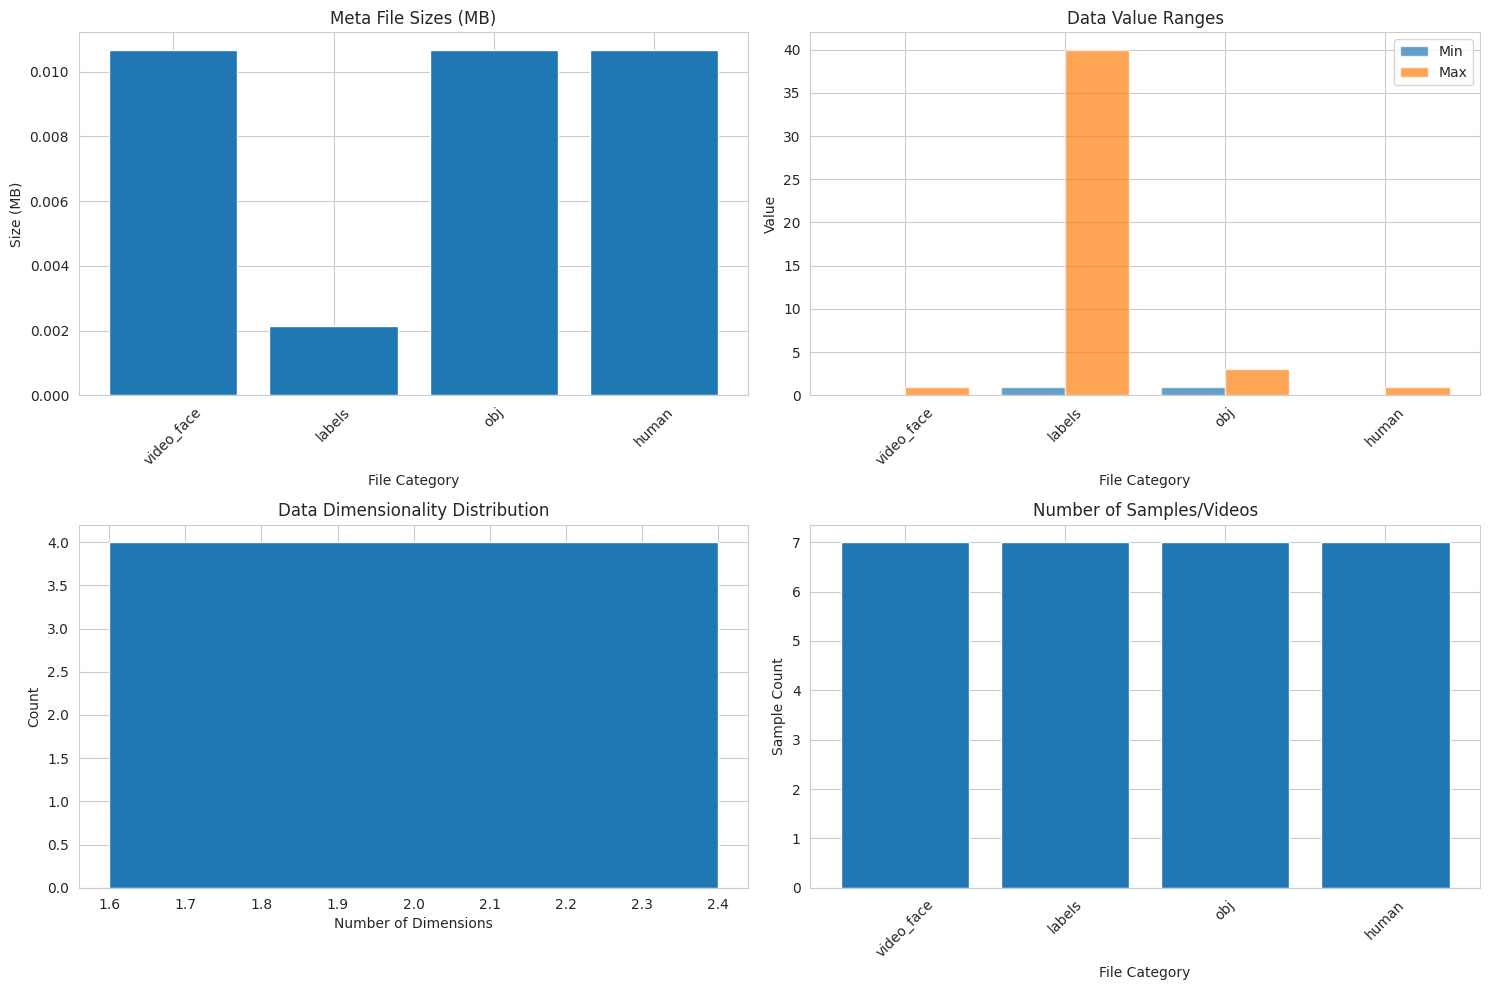

In [18]:
# Analyze relationships between different meta information files
print("=== Cross-File Meta Information Analysis ===")

if 'meta_data_collection' in globals() and len(meta_data_collection) > 1:
    print(f"\n🔗 Analyzing relationships between {len(meta_data_collection)} meta files")
    
    # Check dimension consistency
    print("\n📐 Dimension consistency check:")
    
    shapes_info = {}
    for category, info in meta_data_collection.items():
        shape = info['shape']
        shapes_info[category] = shape
        print(f"  {category:12}: {shape}")
    
    # Find common dimensions
    all_dims = []
    for shape in shapes_info.values():
        all_dims.extend(shape)
    
    from collections import Counter
    dim_counts = Counter(all_dims)
    
    print(f"\n📊 Common dimension sizes:")
    for dim, count in dim_counts.most_common(5):
        if count > 1:  # Only show dimensions that appear multiple times
            files_with_dim = [cat for cat, shape in shapes_info.items() if dim in shape]
            print(f"  {dim:6}: appears in {count} files - {files_with_dim}")
    
    # Analyze correlations if data is compatible
    print(f"\n🔗 Data correlation analysis:")
    
    # Try to find files with same first dimension (likely number of videos/samples)
    same_first_dim = {}
    for category, info in meta_data_collection.items():
        first_dim = info['shape'][0]
        if first_dim not in same_first_dim:
            same_first_dim[first_dim] = []
        same_first_dim[first_dim].append(category)
    
    for dim, categories in same_first_dim.items():
        if len(categories) > 1:
            print(f"\n  Files with {dim} samples: {categories}")
            
            # Try to compute correlation between 1D summaries
            if len(categories) == 2:
                cat1, cat2 = categories
                data1 = meta_data_collection[cat1]['data']
                data2 = meta_data_collection[cat2]['data']
                
                # Reduce to 1D if needed
                if data1.ndim > 1:
                    data1_summary = data1.mean(axis=tuple(range(1, data1.ndim)))
                else:
                    data1_summary = data1
                
                if data2.ndim > 1:
                    data2_summary = data2.mean(axis=tuple(range(1, data2.ndim)))
                else:
                    data2_summary = data2
                
                if len(data1_summary) == len(data2_summary):
                    try:
                        correlation = np.corrcoef(data1_summary, data2_summary)[0, 1]
                        print(f"    Correlation between {cat1} and {cat2}: {correlation:.4f}")
                    except:
                        print(f"    Could not compute correlation between {cat1} and {cat2}")

else:
    print("Insufficient meta files for cross-analysis")

# Summary visualization if we have data
if 'meta_data_collection' in globals() and len(meta_data_collection) > 0:
    print(f"\n📈 Creating summary visualization...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # File sizes comparison
    categories = list(meta_data_collection.keys())
    sizes = [info['data'].nbytes / (1024*1024) for info in meta_data_collection.values()]
    
    axes[0, 0].bar(categories, sizes)
    axes[0, 0].set_title('Meta File Sizes (MB)')
    axes[0, 0].set_xlabel('File Category')
    axes[0, 0].set_ylabel('Size (MB)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Data ranges comparison
    try:
        ranges = [(info['data'].min(), info['data'].max()) for info in meta_data_collection.values()]
        mins, maxs = zip(*ranges)
        
        x_pos = np.arange(len(categories))
        axes[0, 1].bar(x_pos - 0.2, mins, 0.4, label='Min', alpha=0.7)
        axes[0, 1].bar(x_pos + 0.2, maxs, 0.4, label='Max', alpha=0.7)
        axes[0, 1].set_title('Data Value Ranges')
        axes[0, 1].set_xlabel('File Category')
        axes[0, 1].set_ylabel('Value')
        axes[0, 1].set_xticks(x_pos)
        axes[0, 1].set_xticklabels(categories, rotation=45)
        axes[0, 1].legend()
    except:
        axes[0, 1].text(0.5, 0.5, 'Could not compute\nvalue ranges', 
                       ha='center', va='center', transform=axes[0, 1].transAxes)
    
    # Dimensionality comparison
    dimensions = [len(info['shape']) for info in meta_data_collection.values()]
    dim_counts = Counter(dimensions)
    
    axes[1, 0].bar(dim_counts.keys(), dim_counts.values())
    axes[1, 0].set_title('Data Dimensionality Distribution')
    axes[1, 0].set_xlabel('Number of Dimensions')
    axes[1, 0].set_ylabel('Count')
    
    # Sample count comparison (first dimension)
    sample_counts = [info['shape'][0] for info in meta_data_collection.values()]
    
    axes[1, 1].bar(categories, sample_counts)
    axes[1, 1].set_title('Number of Samples/Videos')
    axes[1, 1].set_xlabel('File Category')
    axes[1, 1].set_ylabel('Sample Count')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## 7. SEED-DV Meta Information Summary and Insights

In [20]:
print("=== SEED-DV Meta Information Summary ===")

if 'meta_data_collection' in globals() and len(meta_data_collection) > 0:
    print(f"\n📋 Successfully analyzed {len(meta_data_collection)} meta information files:")
    
    total_size = 0
    for category, info in meta_data_collection.items():
        size_mb = info['data'].nbytes / (1024*1024)
        total_size += size_mb
        print(f"  • {category:12}: {info['shape']} {info['dtype']} ({size_mb:.2f} MB)")
    
    print(f"\n💾 Total meta information size: {total_size:.2f} MB")
    
    # Identify the most likely structure
    print(f"\n🎯 Key findings:")
    
    # Check for video color information
    if 'video_color_data' in globals():
        color_shape = video_color_data.shape
        print(f"  • Video color data found: {color_shape}")
        
        if len(color_shape) == 2 and color_shape[1] == 3:
            print(f"    → Likely RGB values for {color_shape[0]} videos")
        elif len(color_shape) == 3:
            print(f"    → Likely temporal color data: {color_shape[0]} videos × {color_shape[1]} time × {color_shape[2]} channels")
    
    # Check for consistent sample numbers
    first_dims = [info['shape'][0] for info in meta_data_collection.values()]
    if len(set(first_dims)) == 1:
        print(f"  • Consistent number of videos/samples: {first_dims[0]}")
    else:
        print(f"  • Different sample counts across files: {set(first_dims)}")
    
    # Identify potential labels or annotations
    label_files = [cat for cat in meta_data_collection.keys() if 'label' in cat.lower()]
    if label_files:
        print(f"  • Label files found: {label_files}")
        for label_cat in label_files:
            label_data = meta_data_collection[label_cat]['data']
            unique_labels = len(np.unique(label_data))
            print(f"    → {label_cat}: {unique_labels} unique labels")

else:
    print("\n❌ No meta information files were successfully analyzed")
    

=== SEED-DV Meta Information Summary ===

📋 Successfully analyzed 4 meta information files:
  • video_face  : (7, 200) float64 (0.01 MB)
  • labels      : (7, 40) int64 (0.00 MB)
  • obj         : (7, 200) float64 (0.01 MB)
  • human       : (7, 200) float64 (0.01 MB)

💾 Total meta information size: 0.03 MB

🎯 Key findings:
  • Video color data found: (7, 200)
  • Consistent number of videos/samples: 7
  • Label files found: ['labels']
    → labels: 40 unique labels
